# 행렬(Matrix)

In [46]:
import numpy as np

In [47]:
input_x = np.array([[0, 1, 0, 1], # 1열 (0,0) / 2열 (1, 0) / 3열 (0, 1) / 4열(1, 1)
                    [0, 0, 1, 1]])
input_w = np.array([[1, 2],
                    [3, 4]])

In [48]:
hidden_w = np.array([[5, 6]])

In [49]:
input_w.shape

(2, 2)

In [50]:
input_x.shape

(2, 4)

In [51]:
hidden_w.shape

(1, 2)

# 스칼라(Scalar)

In [88]:
#numpy 에서 스칼라를 만드는 방법은 쉽다.
#주의 해야 할 점은 계산할 행렬의 크기를 알고 있으면 정확히 명시해 주는 게 좋다.
input_b = np.array([-2])
hidden_b = np.array([-2])

In [89]:
input_b.shape

(1,)

In [54]:
hidden_b.shape

(1,)

# 브로드캐스팅

In [55]:
matrix_1 = np.array([[0, 1, 2],
                     [3, 4, 5],
                     [6, 7, 8],
                     [9, 10, 11]])
matrix_2 = np.array([0, 1, 2])

In [56]:
matrix_1.shape

(4, 3)

In [57]:
matrix_2.shape

(3,)

In [58]:
matrix_1 + matrix_2# 덧셈은 물론

array([[ 0,  2,  4],
       [ 3,  5,  7],
       [ 6,  8, 10],
       [ 9, 11, 13]])

In [59]:
np.dot(matrix_1,matrix_2)#행렬 곱도 된다

array([ 5, 14, 23, 32])

# axis  개념

In [60]:
A = np.arange(0, 32).reshape(4,2,4)# 4 / 2열 / 4행

In [61]:
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[24, 25, 26, 27],
        [28, 29, 30, 31]]])

In [62]:
A.sum()#모든 값의 합

496

In [63]:
A.sum(axis=0)#x축을 기준으로 여러 row를 한개로 합침

array([[48, 52, 56, 60],
       [64, 68, 72, 76]])

In [64]:
A.sum(axis=1)#y축을 기준으로 column들의 값을 합침

array([[ 4,  6,  8, 10],
       [20, 22, 24, 26],
       [36, 38, 40, 42],
       [52, 54, 56, 58]])

In [65]:
A.sum(axis=2)#z축을 기준으로 depth 값을 축소

array([[  6,  22],
       [ 38,  54],
       [ 70,  86],
       [102, 118]])

# 시그모이드

In [66]:
def sigmoid(x):
    return (1.0/(1.0+np.exp(-x)))

In [67]:
np.exp(1)#자연상수 e 는 2.71828182846...을 가지는 무리수

2.718281828459045

In [68]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

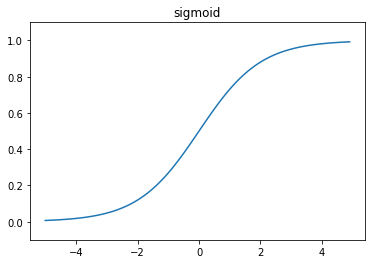

In [69]:
import matplotlib.pyplot as plt
#노트북 내부에 표현 할 수 있도록 설정
%matplotlib inline
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.title('sigmoid')
plt.show()

# 계단함수

In [70]:
def step(x):
    bool_data = x.astype(np.float) > 0
    return bool_data.astype(np.int)#bool data를 int 정수 형태로 변환 후 return

In [71]:
x = np.arange(-5.0, 5.0, 0.1)# -5.0 ~ 5.0 까지 배열 생성
x.astype(np.float) > 0 #bool type 정수로 변환 0보다 작다면 False / 0이상은 True

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [72]:
y = step(x)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

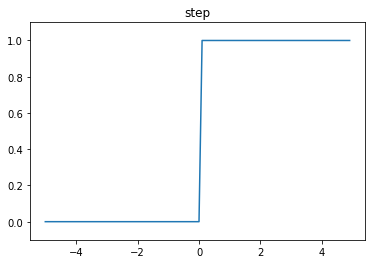

In [73]:
import matplotlib.pyplot as plt
#노트북 내부에 표현 할 수 있도록 설정
%matplotlib inline
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y축 범위 지정
plt.title('step')
plt.show()

# Input Layer 계산

In [74]:
input_sigma = np.dot(input_w,input_x)# W x X

In [75]:
input_sigma#값이 제대로 나옴

array([[0, 1, 2, 3],
       [0, 3, 4, 7]])

In [76]:
input_sigma + input_b#브로드 캐스트에 의하여 모든 배열에 스칼라 b값이 적용

array([[-2, -1,  0,  1],
       [-2,  1,  2,  5]])

In [77]:
hidden_x = (inpusigmoidt_sigma + input_b)

In [78]:
hidden_x

array([[0.11920292, 0.26894142, 0.5       , 0.73105858],
       [0.11920292, 0.73105858, 0.88079708, 0.99330715]])

# Hidden Layer 계산

In [90]:
hidden_sigma = np.dot(hidden_w,hidden_x)# W x X

In [91]:
hidden_sigma#값이 제대로 나옴

array([[1.31123214, 5.73105858, 7.78478247, 9.61513579]])

In [97]:
#활성화 함수 넣기 전
h = hidden_sigma + hidden_b
h

array([[-0.68876786,  3.73105858,  5.78478247,  7.61513579]])

In [98]:
#시그모이드 함수로 계산을 했을경우
sigmoid(h) 

array([[0.33430723, 0.97659354, 0.99693544, 0.99950731]])

In [99]:
#계단 함수로 계산을 했을경우
step(h) # 0 / 1 / 1 / 1

array([[0, 1, 1, 1]])